# Implementación de K-Means en Python <img src="fcfm.png" style="width: 80px;" style="float: right;"  align="right"  margin-right= "50px"/>

032 E2024 Inteligencia Artificial 

Dr. Luis Ángel Gutiérrez Rodríguez

Ismael Sandoval Aguilar 

Mauricio Leonardo Ponce Barragán

30 de mayo de 2024

### Kmins

In [11]:
import kmins as k
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

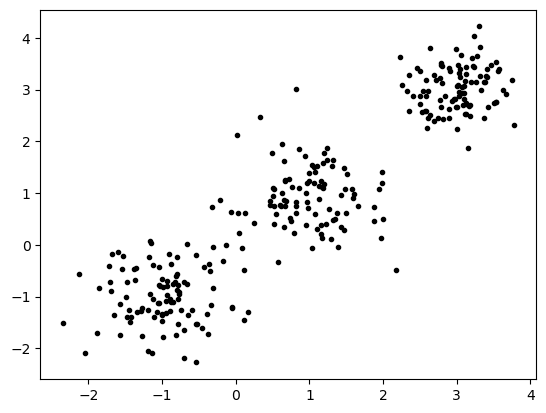

In [3]:
# Simulación de datos
np.random.seed(21212)

x1 = np.random.standard_normal((100, 2)) * 0.6 + np.ones((100, 2))
x2 = np.random.standard_normal((100, 2)) * 0.5 - np.ones((100, 2))
x3 = np.random.standard_normal((100, 2)) * 0.4 - 2 * np.ones((100, 2)) + 5
X = np.concatenate((x1, x2, x3), axis=0)

plt.plot(X[:, 0], X[:, 1], 'k.')
plt.show()

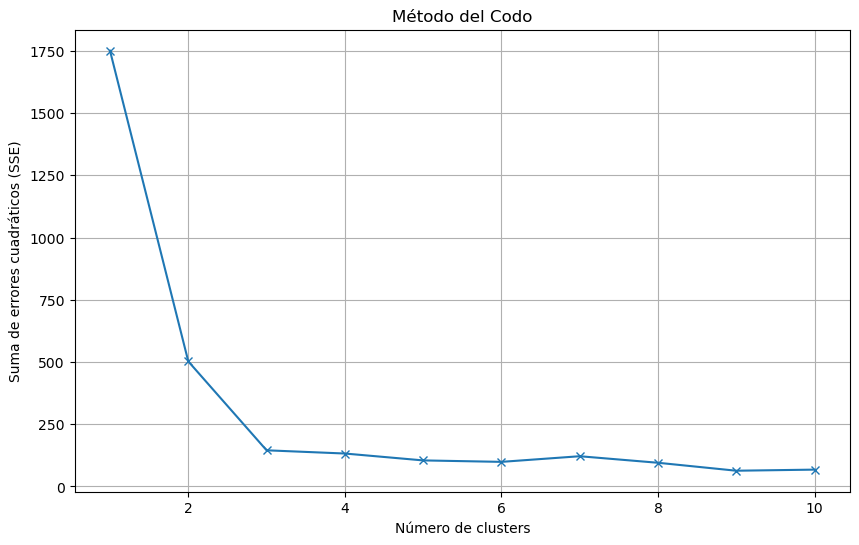

Suma de errores cuadráticos (SSE) para cada valor de k:
k=1: SSE=1750.4614475279998
k=2: SSE=502.4200913703073
k=3: SSE=145.2454277000922
k=4: SSE=132.29464453186299
k=5: SSE=104.64870186000567
k=6: SSE=98.78688045358338
k=7: SSE=121.4344971600344
k=8: SSE=95.1552672889221
k=9: SSE=63.21301454415857
k=10: SSE=67.63439061058126


In [4]:
# Escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Crear una instancia de KMins y usar el método del codo para determinar el número óptimo de clusters
kmeans = k.KMins(k=1, max_iter=300, tol=1e-4)
#kmeans.metodo_del_codo(X, max_k=10)

# Aplicar el método del codo para determinar el número óptimo de clusters
sse = kmeans.metodo_del_codo(X, max_k=10)

# Imprimir los valores de SSE para cada k
print("Suma de errores cuadráticos (SSE) para cada valor de k:")
for i, sse_value in enumerate(sse, start=1):
    print(f"k={i}: SSE={sse_value}")

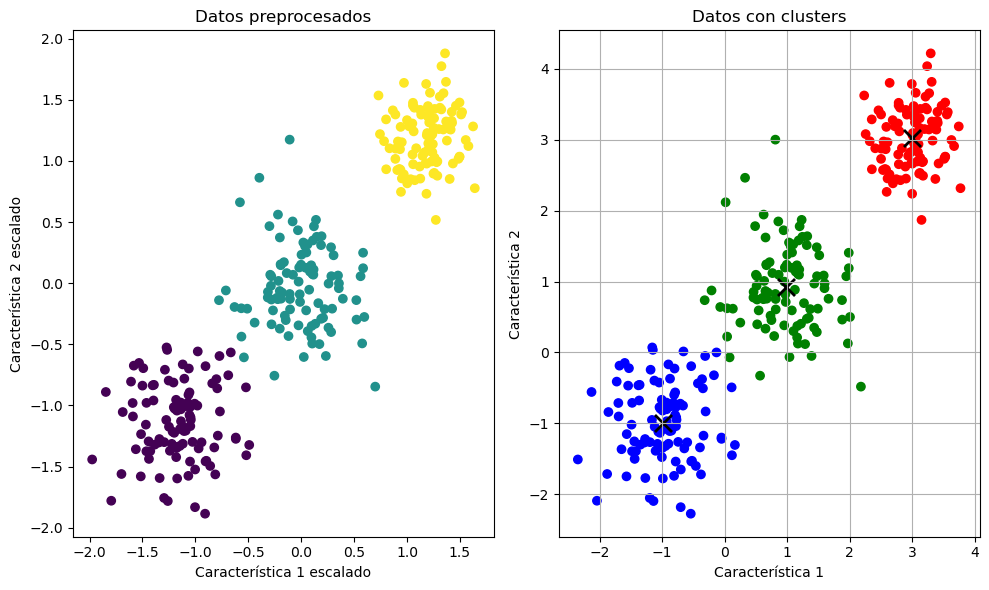

In [5]:
# Ajustar el modelo con el número óptimo de clusters
kmeans_optimo = k.KMins(k=3, max_iter=300, tol=1e-4)
kmeans_optimo.ajustar(X)

# Visualizacion
plt.figure(figsize=(10, 6))

# Graficar el dataset escalado
plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_optimo.etiquetas)
plt.title('Datos preprocesados')
plt.xlabel('Característica 1 escalado')
plt.ylabel('Característica 2 escalado')

# Graficar el dataset original con clusteres
plt.subplot(1, 2, 2)
colores = np.array(['b', 'g', 'r', 'c', 'm', 'y'])
plt.scatter(X[:, 0], X[:, 1], c=[colores[label] for label in kmeans_optimo.etiquetas])
plt.scatter(kmeans_optimo.centroides[:, 0], kmeans_optimo.centroides[:, 1], marker='x', s=150, c='black', linewidths=2)
plt.title('Datos con clusters')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.grid(True)

plt.tight_layout()
plt.show()

In [6]:
# Rendimiento
score_silhouette = silhouette_score(X_scaled, kmeans_optimo.etiquetas)
print("Índice Silhouette:", score_silhouette)

Índice Silhouette: 0.673987875005237


### Scikit-Learn 

In [7]:
from sklearn.cluster import KMeans

/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change fr

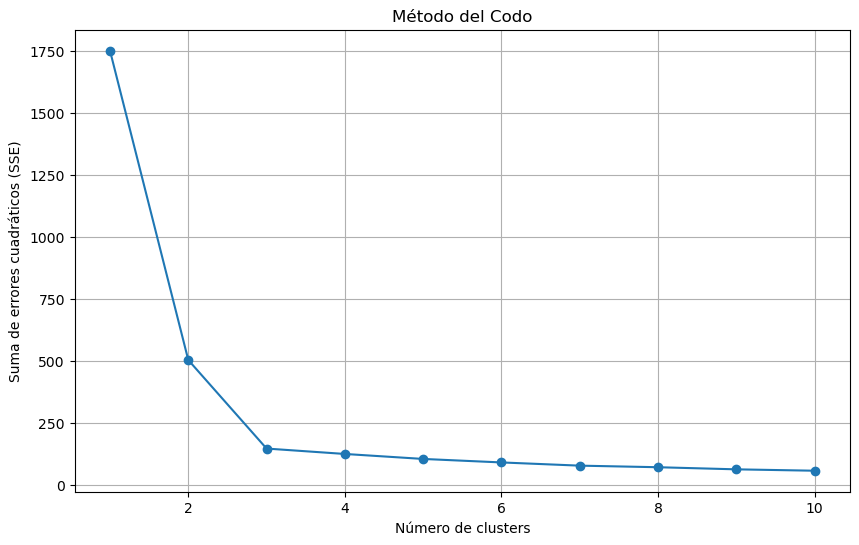

Suma de errores cuadráticos (SSE) para cada valor de k:
k=1: SSE=1750.4614475279998
k=2: SSE=502.4200913703073
k=3: SSE=145.24542770009216
k=4: SSE=123.43161575768441
k=5: SSE=103.33942797262065
k=6: SSE=89.24510670696792
k=7: SSE=76.27761889289889
k=8: SSE=69.91379023325769
k=9: SSE=61.38620615582298
k=10: SSE=55.80352612691526


In [8]:
# Método del codo
sse = []
max_k = 10
for k in range(1, max_k + 1):
    kmeans = KMeans(n_clusters=k, random_state=21212)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, max_k + 1), sse, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de clusters')
plt.ylabel('Suma de errores cuadráticos (SSE)')
plt.grid(True)
plt.show()

# Imprimir los valores de SSE para cada k
print("Suma de errores cuadráticos (SSE) para cada valor de k:")
for i, sse_value in enumerate(sse, start=1):
    print(f"k={i}: SSE={sse_value}")


/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


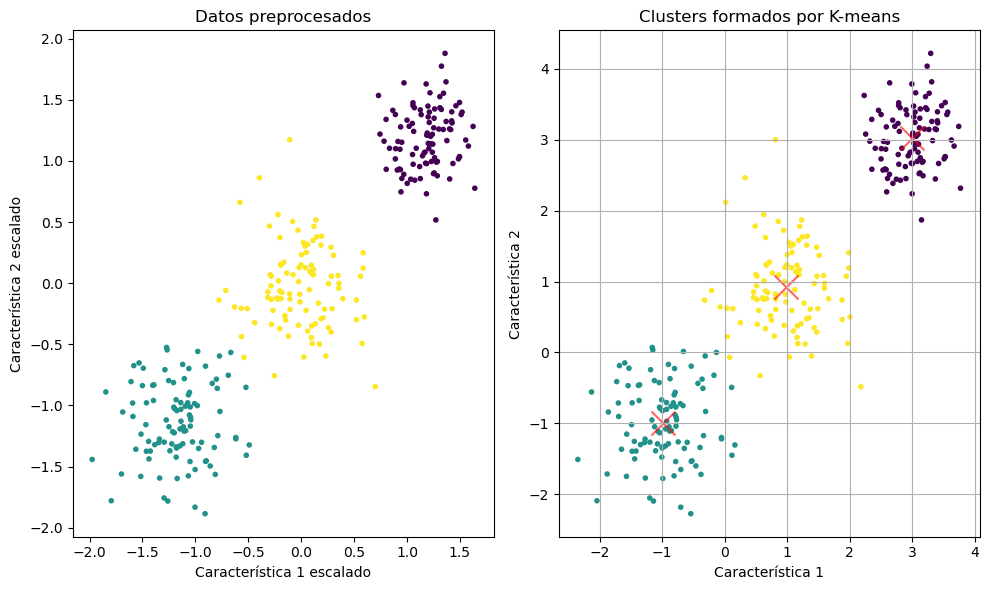

In [9]:
# Aplicar K-means usando scikit-learn
kmeans = KMeans(n_clusters=3, random_state=21212)
kmeans.fit(X)

# Obtener etiquetas de los clusters y centroides
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Visualización
plt.figure(figsize=(10, 6))

# Graficar el dataset escalado
plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', marker='.')
plt.title('Datos preprocesados')
plt.xlabel('Característica 1 escalado')
plt.ylabel('Característica 2 escalado')

# Visualizar los datos con los clusters y los centroides
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='.')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=300, alpha=0.6, marker='x')
plt.title("Clusters formados por K-means")
plt.xlabel("Característica 1")
plt.ylabel("Característica 2")
plt.grid(True)

plt.tight_layout()
plt.show()

In [10]:
# Rendimiento
score_silhouette = silhouette_score(X_scaled, kmeans.labels_)
print("Índice Silhouette:", score_silhouette)

Índice Silhouette: 0.673987875005237
